In [53]:
import numpy as np
from sympy import symbols, Eq, solve, diff
import matplotlib.pyplot as plt
import math

{a: 0.500000000000000, b: 0.200000000000000}


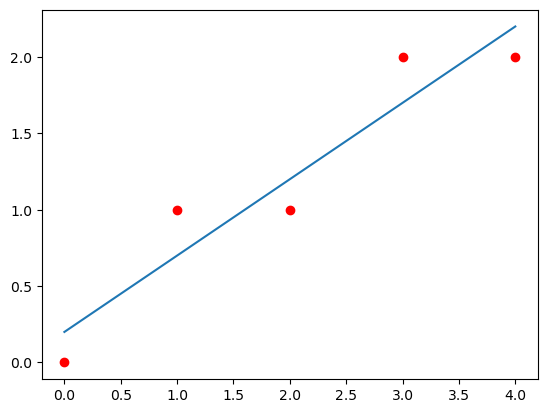

In [55]:
nodes = np.array([0.0, 1, 2, 3, 4])
values = np.array([0.0, 1, 1, 2, 2])

a, b = symbols('a, b')

def f(x):
    return a*x + b

phi = 0

for i in range(nodes.size):
    phi += (f(nodes[i]) - values[i])**2

diffA = diff(phi, a)
diffB = diff(phi, b)

solution = solve([Eq(diffA, 0), Eq(diffB,0)])
print(solution)

def f_solution(x, solution_dict):
    return solution_dict[a]*x + solution_dict[b]

plt.scatter(nodes, values, color='red')

x_axis = np.linspace(0, 4, 100)

plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

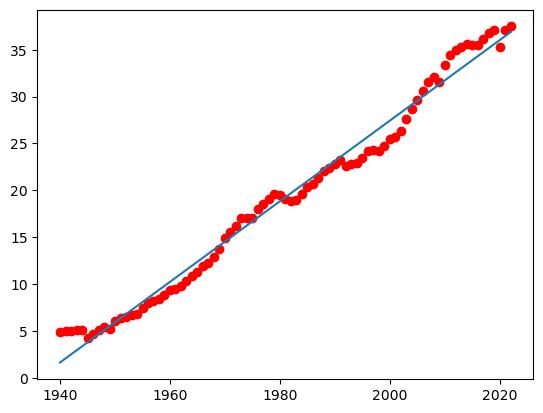

In [57]:
# task 2

import pandas as pd

table = pd.read_csv('CO_2_data.csv')
nodes = table['year']
values = table['co2']

a, b = symbols('a, b')

def f(x):
    return a*x + b

phi = 0

for i in range(nodes.size):
    phi += (f(nodes[i]) - values[i])**2

diffA = diff(phi, a)
diffB = diff(phi, b)

solution = solve([Eq(diffA, 0), Eq(diffB, 0)])

def f_solution(x, sol_dict):
    return sol_dict[a]*x + sol_dict[b]

plt.scatter(nodes,values,color='red')

x_axis = np.linspace(1940, 2022, 150)

plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

{b: 0.249215934116305, c: -497.459709696735}


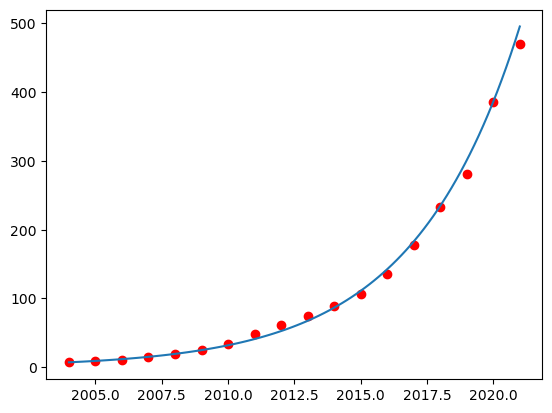

In [63]:
# task 3

table = pd.read_csv('amazon_sales_net_revenue.csv')
nodes = table['year']
values = table['revenue']

# ln yi = c + b * xi

b, c = symbols('b, c')

def f(x):
    return b * x + c

phi = 0

for i in range(nodes.size):
    phi += (f(nodes[i]) - np.log(values[i]))**2

diffB = diff(phi, b)
diffC = diff(phi, c)

solution = solve([Eq(diffB, 0), Eq(diffC, 0)])
print(solution)
def f_solution(x, sol_dict):
    return math.e ** (sol_dict[b]*x + sol_dict[c])

x_axis = np.linspace(2004, 2021, 100)

plt.scatter(nodes,values,color='red')
plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

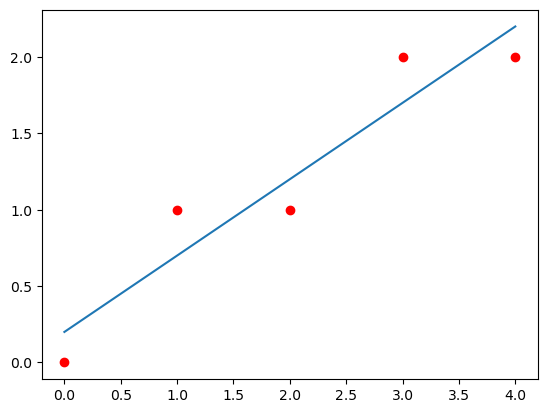

In [80]:
# task 4

nodes = np.array([0, 1, 2, 3, 4])
values = np.array([0, 1, 1, 2, 2])

# linear function f(x) = a * x + b has n = 2

n = 2

def generate_row(startPoint):
    endPoint = startPoint + n
    row = []
    for i in range(startPoint, endPoint):
        sum = 0
        for j in range(nodes.size):
            sum += nodes[j] ** i
        row.append(sum)
    return row
    
matrix = []

for i in range(n):
    matrix.append(generate_row(i))

right_side = []

for i in range(n):
    sum = 0
    for j in range(values.size):
        sum += values[j] * (nodes[j] ** i)
    right_side.append(sum)

solution = np.linalg.solve(matrix, right_side)

def f_solution(x, sol_dict):
    return sol_dict[0] + sol_dict[1] * x

plt.scatter(nodes, values, color='red')
x_axis = np.linspace(0, 4, 100)
plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

In [89]:
# task 5

x, y = symbols('x, y')

phi = 0

phi = (x-y-1)**2 + (x+y-1)**2 + (x+y+1)**2 + (x-y+1)**2

diffX = diff(phi, x)
diffY = diff(phi, y)

solution = solve([Eq(diffX, 0), Eq(diffY, 0)])
print(solution)

{x: 0, y: 0}


In [108]:
# task 6

def f(x):
    return x**3

a = 0.5
b = 1.5

# pravougl

value = (b-a) * f((a+b)/2)
print(value)

err = 9.0/24 * (b-a)**3
print(err)

# trapec

value = (b-a)/2 * (f(a) + f(b))
print(value)

err = 9.0/12 * (b-a)**3
print(err)

# simpson

value = (b-a)/6 * (f(a) + 4*f((a+b)/2) + f(b))
print(value)

err = 0
print(err)

1.0
0.375
1.75
0.75
1.25
0


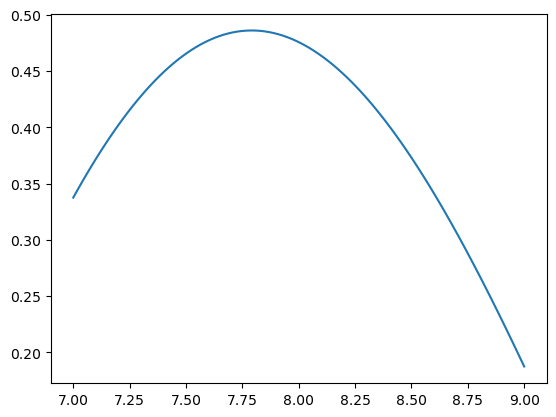

0.9515614907107687
0.5251875296832664
0.8094368370349346


In [123]:
# task 7
a = 7
b = 9

def f(x):
    return np.sin(x) / np.log(x)

x_axis = np.linspace(7, 9, 100)
plt.plot(x_axis, f(x_axis))
plt.show()

pravougl = (b-a) * f((a+b)/2)
trapec = (b-a)/2 * (f(a) + f(b))
simpson = (b-a)/6 * (f(a) + 4*f((a+b)/2) + f(b))

print(pravougl)
print(trapec)
print(simpson)

In [126]:
import scipy as sp

In [129]:
print(sp.integrate.quad(f, a, b))

(0.804964022751974, 8.936895920541299e-15)
